<a href="https://colab.research.google.com/github/Nehasatheesh04/machine_learning-and-parallel_computing-lab/blob/main/ML_LAB_CYCLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1


In [ ]:
!pip install idx2numpy

In [ ]:
import os
import idx2numpy
import numpy as np

import torch
from torchvision import datasets, transforms
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score

In [ ]:
train_images_path = "/content/train-images-idx3-ubyte"
train_labels_path = "/content/train-labels-idx1-ubyte"
test_images_path = "/content/test-images-idx3-ubyte"
test_labels_path = "/content/test-labels-idx1-ubyte"

train_images = idx2numpy.convert_from_file(train_images_path)
train_labels = idx2numpy.convert_from_file(train_labels_path)
test_images = idx2numpy.convert_from_file(test_images_path)
test_labels = idx2numpy.convert_from_file(test_labels_path)

print(f'Training images shape {train_images.shape}')
print(f'Training labels shape {train_labels.shape}')
print(f'Test images shape {test_images.shape}')
print(f'Test labels shape {test_labels.shape}')

Training images shape (60000, 28, 28)
Training labels shape (60000,)
Test images shape (10000, 28, 28)
Test labels shape (10000,)


In [ ]:
mean_train = np.mean(train_images)/255
std_train = np.std(train_images)/255

mean_test = np.mean(test_images)/255
std_test = np.std(test_images)/255

print(f'Train images mean = {mean_train}')
print(f'Train images std = {std_train}')
print(f'Test images mean = {mean_test}')
print(f'Test images std = {std_test}')

Train images mean = 0.1306604762738429
Train images std = 0.30810780385646264
Test images mean = 0.13251460584233693
Test images std = 0.3104802479305351


In [ ]:
from torch.utils.data import Dataset, DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean = mean_train, std = std_train)
])

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]
        label = self.labels[index]

        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
full_train_dataset = CustomDataset(train_images, train_labels, transform)
test_dataset = CustomDataset(test_images, test_labels, transform)

train_dataset, val_dataset = train_test_split(full_train_dataset, test_size = 0.2, random_state = 42)

train_dataloader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test_images, batch_size=64, shuffle=False)

print(f'Training images length = {len(train_dataset)}')
print(f'Validation images length = {len(val_dataset)}')
print(f'Test images length = {len(test_dataset)}')

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/functional.py:154: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


Training images length = 48000
Validation images length = 12000
Test images length = 10000


In [ ]:
one_hot_labels = F.one_hot(torch.tensor(test_labels, dtype = torch.long), num_classes=10)
print(one_hot_labels)

tensor([[0, 0, 0,  ..., 1, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])


Q2

In [ ]:
train_images = np.array([item[0].numpy().flatten() for item in train_dataset])
train_labels = np.array([item[1] for item in train_dataset])

test_images = np.array([item[0].numpy().flatten() for item in test_dataset])
test_labels = np.array([item[1] for item in test_dataset])

model = LogisticRegression(max_iter=1000)
model.fit(train_images, train_labels)
test_pred = model.predict(test_images)

accuracy = accuracy_score(test_labels, test_pred)
precision = precision_score(test_labels, test_pred, average='weighted')
F1_score = f1_score(test_labels, test_pred, average='weighted')

print(f'Accuracy = {accuracy}')
print(f'Precision = {precision}')
print(f'F1-score = {F1_score}')

Accuracy = 0.9193
Precision = 0.91906972268138
F1-score = 0.9190867474376774


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01],
    'penalty': ['l2'],
    'solver': ['saga'],
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_images, train_labels)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Best Accuracy: 0.9185208333333333


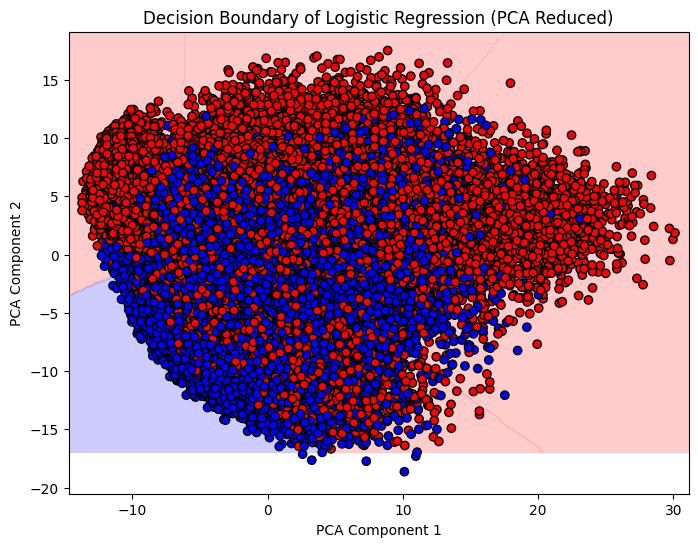

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


pca = PCA(n_components=2)
train_images_2d = pca.fit_transform(train_images)
test_images_2d = pca.fit_transform(test_images)

model_2d = LogisticRegression(max_iter=1000)
model_2d.fit(train_images_2d, train_labels)

x_min, x_max = train_images_2d[:, 0].min() -1, train_images_2d[:,0].max() + 1
y_min, y_max = test_images_2d[:, 1].min() - 1, test_images_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Predict labels for each point in the grid
z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_background = ListedColormap(["#FFAAAA", "#AAAAFF"])  # Light red & blue
cmap_points = ListedColormap(["#FF0000", "#0000FF"])  # Red & blue

plt.contourf(xx, yy, z, cmap=cmap_background, alpha=0.6)  # Decision boundary
plt.scatter(train_images_2d[:, 0], train_images_2d[:, 1], c=train_labels, cmap=cmap_points, edgecolors="k")

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Decision Boundary of Logistic Regression (PCA Reduced)")
plt.show()

Q3


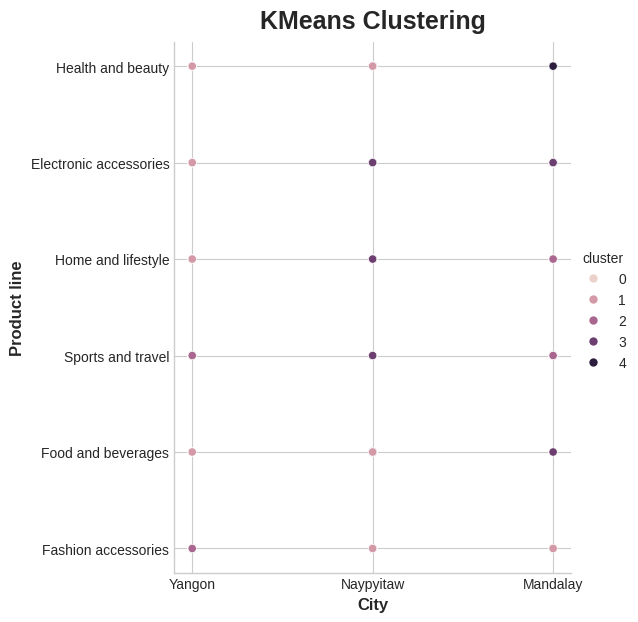

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


data_path = "/content/supermarket_sales - Sheet1.csv"
data = pd.read_csv(data_path)

features = ["City", "Gender", "Product line", "Total", "Payment"]

preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), ["Total"]),
        ('cat', OneHotEncoder(), ["City", "Gender", "Product line", "Payment"])
    ])

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('kmeans', KMeans(n_clusters=5, random_state=42))
])

X = data[features]
pipeline.fit(X)

data['cluster'] = pipeline.named_steps['kmeans'].labels_


plt.style.use("seaborn-v0_8-whitegrid")
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

sns.relplot(data=data, x='City', y='Product line', hue='cluster', height=6)
plt.title("KMeans Clustering")
plt.xlabel("City")
plt.ylabel("Product line")
plt.show()


Distorion values : 
1 : 1.8894936310622172
2 : 1.7100882476751738
3 : 1.598533134541595
4 : 1.5549183337422354
5 : 1.513443969019998
6 : 1.471991592714138
7 : 1.4530877052832913
8 : 1.393458573361475
9 : 1.3738885348591474


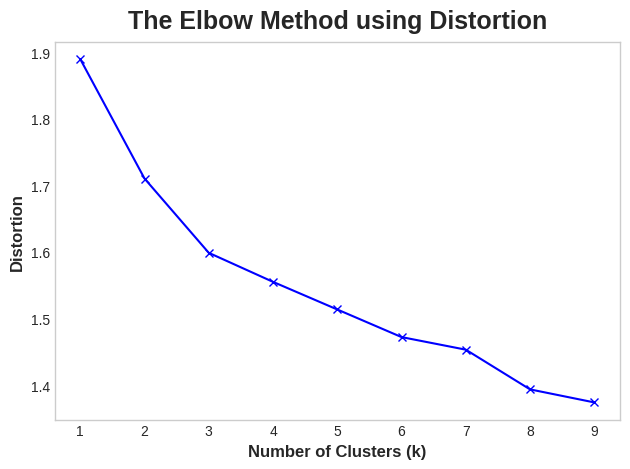

Inertia values:
1 : 3665.3879999999995
2 : 2934.1899833691177
3 : 2570.815182107379
4 : 2442.0966326838634
5 : 2308.3569466110716
6 : 2187.6812310182495
7 : 2141.0963931120014
8 : 1972.704077053586
9 : 1914.9034589910125


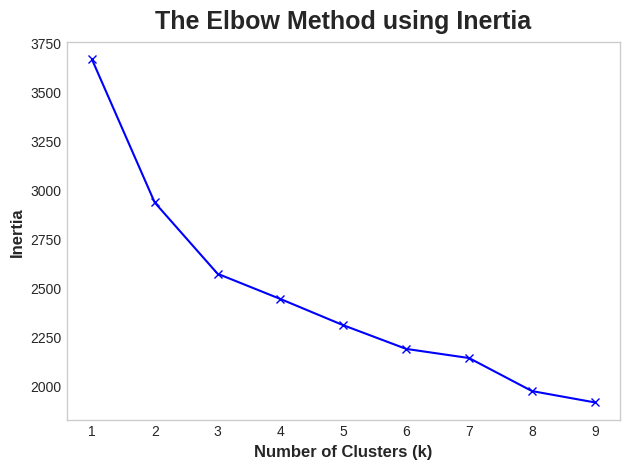

In [ ]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K :
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('kmeans', KMeans(n_clusters=k, random_state=42))
    ])

    pipeline.fit(X)
    X_transformed = pipeline.named_steps['preprocess'].transform(X)

    distortions.append(sum(np.min(cdist(X_transformed, pipeline.named_steps['kmeans'].cluster_centers_, 'euclidean'), axis=1)) / X_transformed.shape[0])

    inertias.append(pipeline.named_steps['kmeans'].inertia_)

    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

print("Distorion values : ")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.grid()
plt.show()

print("Inertia values:")
for key, val in mapping2.items():
    print(f'{key} : {val}')
# Plotting the graph of k versus Inertia
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.grid()
plt.show()

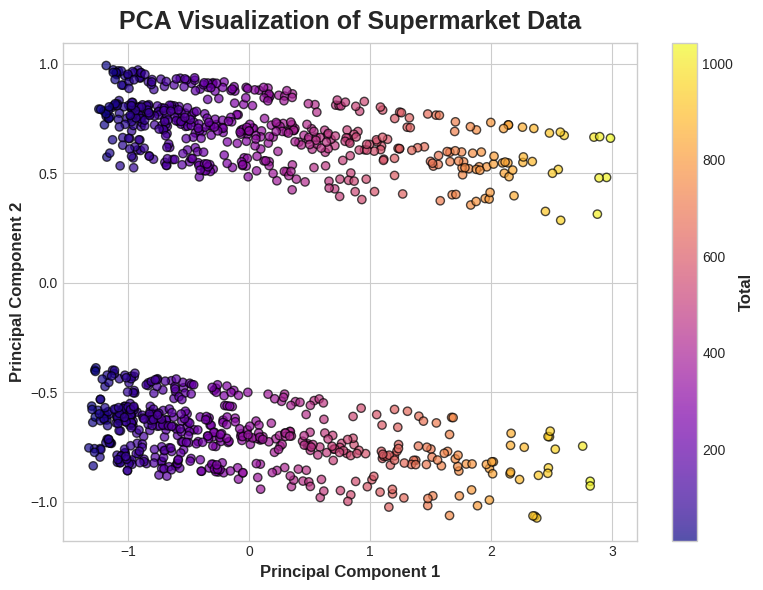

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

data['PC1'] = X_pca[:, 0]
data['PC2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(data['PC1'], data['PC2'], c=data['Total'], cmap='plasma', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Supermarket Data')
plt.colorbar(label='Total')
plt.grid(True)
plt.show()

Q4

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris_data = load_iris()

X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = pd.Series(iris_data.target, name = 'species')

print(X.head())
print(y.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64


In [ ]:
print("First five data : ")
print(X.head())
print("\nInformation : ")
print(X.info())
print("\nDescription : ")
print(X.describe())
print("\nMissing Values : ")
print(X.isnull().sum())

First five data : 
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Information : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None

Description : 
       sepal length (cm)  sepal width (cm)  petal length

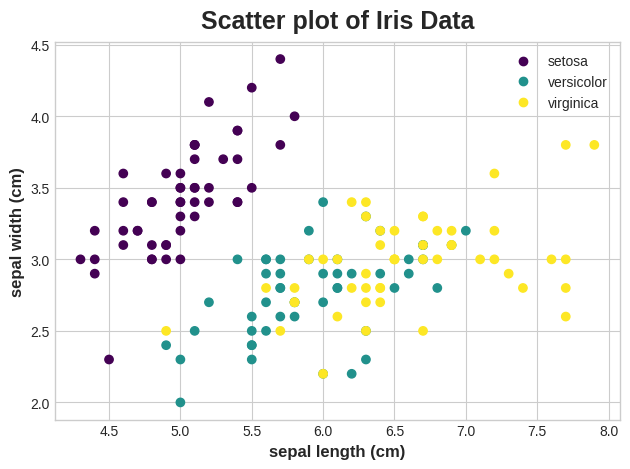

In [ ]:
import matplotlib.pyplot as plt

scatter_plot = plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=y, cmap='viridis')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Scatter plot of Iris Data')

legend_labels = {i:name for i, name in enumerate(iris_data.target_names)}
plt.legend(handles=scatter_plot.legend_elements()[0], labels=legend_labels.values())
plt.show()

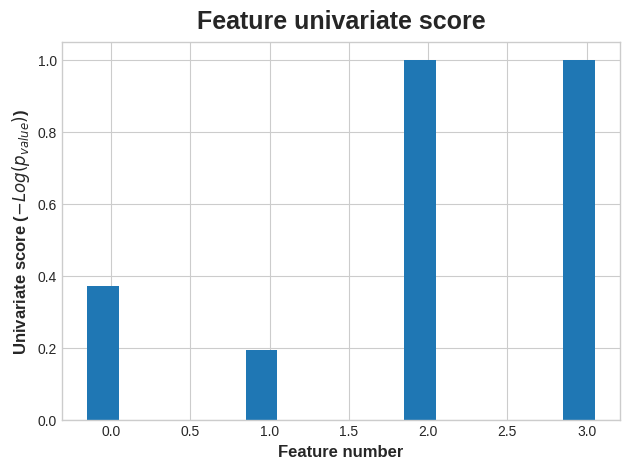

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

X_indices = np.arange(X.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feature_set = [f'feature{i}' for i in range(X.shape[-1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Elapsed time to compute the importances: 2.255 seconds


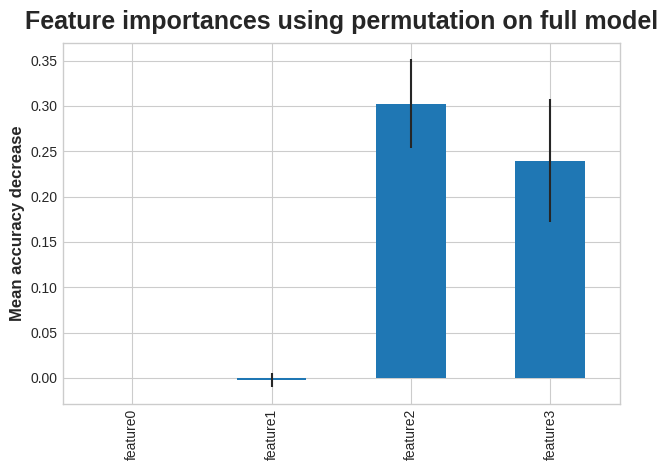

In [ ]:
import time
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state = 42, n_jobs=-1
)

elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_set)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import RFECV, RFE
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

svc = SVC(kernel="linear", C=1)
rfecv = RFECV(estimator=svc, step=2, cv=StratifiedKFold(4), scoring='accuracy')

rfecv.fit(X, y)

print('Optimal number of features: {}'.format(rfecv.n_features_))
print("Selected features:", rfecv.support_)
print("Feature ranking:", rfecv.ranking_)

Optimal number of features: 4
Selected features: [ True  True  True  True]
Feature ranking: [1 1 1 1]


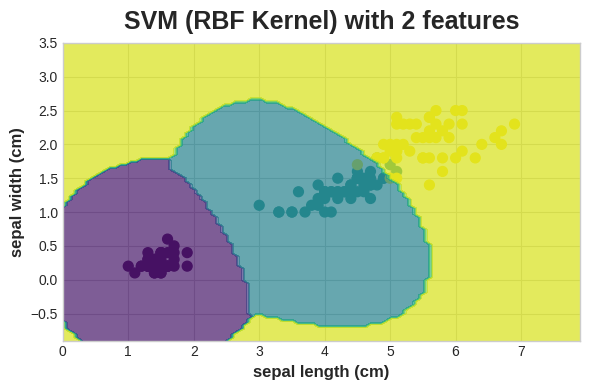

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

X_for_SVM = X.iloc[:, 2:4]

model = SVC(kernel = "rbf", C=1, gamma=0.7)
model.fit(X_for_SVM, y)
title = "SVM (RBF Kernel) with 2 features"
plt.figure(figsize=(6, 4))
plt.scatter(X_for_SVM.iloc[:, 0], X_for_SVM.iloc[:, 1], c=y, s=50, cmap='viridis')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(title)

disp = DecisionBoundaryDisplay.from_estimator(model,
                                              X_for_SVM,
                                              response_method='predict',
                                              cmap='Dark2',
                                              alpha = 0.8,
                                              ax=ax)
disp.plot(ax=plt.gca(), cmap='viridis', alpha=0.7)

Q5


In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# B. Dataset:
# a. Take any dataset containing transactions from a grocery store.
# b. Load the provided dataset containing transactional data from a grocery store.
grocery_data_path = '/content/Groceries_dataset.csv'
grocery_data = pd.read_csv(grocery_data_path)

# c. Examine the structure of the dataset to understand the transactional format.
grocery_data['Date'] = pd.to_datetime(grocery_data['Date'], format='%d-%m-%Y')
print(grocery_data.head())
print(f"Transaction Info : {grocery_data.shape}")



   Member_number       Date   itemDescription
0           1808 2015-07-21    tropical fruit
1           2552 2015-01-05        whole milk
2           2300 2015-09-19         pip fruit
3           1187 2015-12-12  other vegetables
4           3037 2015-02-01        whole milk
Transaction Info : (38765, 3)


In [3]:
# C. Generating Itemsets:
# a. Implement a function to generate individual itemsets from the dataset.
def individual_itemset(data):
    unique_items = set(data['itemDescription'])
    print(f"Total Unique Items : {len(unique_items)}")
    print(f"Unique Items : {unique_items}")
    return unique_items

unique_items = individual_itemset(grocery_data)

# b. Calculate the support for each itemset (frequency of occurrence of each item).
df = grocery_data["itemDescription"].value_counts()[:20].reset_index()
df.columns = ["Category", "Count"]
print(df)

# Create a unique transaction identifier
grocery_data["Single_transaction"] = grocery_data["Member_number"].astype(str) + "_" + grocery_data["Date"].astype(str)
print(grocery_data.head())

# Convert dataset into a list of transactions
transaction_data = grocery_data.groupby("Single_transaction")["itemDescription"].apply(list).tolist()
print(transaction_data[:5])

# Transaction Encoding
te = TransactionEncoder()
te_ary = te.fit(transaction_data).transform(transaction_data)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
print(df_encoded.head())
print(df_encoded.sum())


Total Unique Items : 167
Unique Items : {'soups', 'soap', 'snack products', 'toilet cleaner', 'domestic eggs', 'skin care', 'female sanitary products', 'frozen dessert', 'pickled vegetables', 'roll products ', 'flour', 'processed cheese', 'dish cleaner', 'dental care', 'kitchen utensil', 'rubbing alcohol', 'baby cosmetics', 'tea', 'turkey', 'pet care', 'cereals', 'ketchup', 'liquor (appetizer)', 'Instant food products', 'beverages', 'canned fruit', 'frozen chicken', 'kitchen towels', 'canned vegetables', 'zwieback', 'specialty vegetables', 'house keeping products', 'ham', 'oil', 'rice', 'baking powder', 'fish', 'brown bread', 'butter milk', 'sparkling wine', 'UHT-milk', 'citrus fruit', 'frozen meals', 'bags', 'meat spreads', 'pot plants', 'specialty cheese', 'cooking chocolate', 'cake bar', 'margarine', 'detergent', 'pudding powder', 'hamburger meat', 'curd', 'frozen potato products', 'cling film/bags', 'semi-finished bread', 'fruit/vegetable juice', 'specialty chocolate', 'waffles', '

In [4]:
# D. Identifying Frequent Itemsets:

min_support = 0.01  # Minimum support threshold
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
print(frequent_itemsets)


     support                        itemsets
0   0.021386                      (UHT-milk)
1   0.033950                          (beef)
2   0.021787                       (berries)
3   0.016574                     (beverages)
4   0.045312                  (bottled beer)
..       ...                             ...
64  0.010559  (other vegetables, rolls/buns)
65  0.014837  (other vegetables, whole milk)
66  0.013968        (whole milk, rolls/buns)
67  0.011629              (whole milk, soda)
68  0.011161            (whole milk, yogurt)

[69 rows x 2 columns]


In [7]:
# E. Deriving Association Rules:
# a. Utilize the frequent itemsets obtained from the Apriori algorithm to derive association rules.
min_confidence = 0.01  # Minimum confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
print(rules)






          antecedents         consequents  antecedent support  \
0  (other vegetables)        (rolls/buns)            0.122101   
1        (rolls/buns)  (other vegetables)            0.110005   
2  (other vegetables)        (whole milk)            0.122101   
3        (whole milk)  (other vegetables)            0.157923   
4        (whole milk)        (rolls/buns)            0.157923   
5        (rolls/buns)        (whole milk)            0.110005   
6        (whole milk)              (soda)            0.157923   
7              (soda)        (whole milk)            0.097106   
8        (whole milk)            (yogurt)            0.157923   
9            (yogurt)        (whole milk)            0.085879   

   consequent support   support  confidence      lift  representativity  \
0            0.110005  0.010559    0.086481  0.786154               1.0   
1            0.122101  0.010559    0.095990  0.786154               1.0   
2            0.157923  0.014837    0.121511  0.769430      

In [6]:
# F. Evaluation of Association Rules:
# a. Evaluate the generated association rules using support, confidence, and lift.
filtered_data = rules[(rules['confidence'] > 0.1) & (rules['lift'] > 0.8)]
print(filtered_data)

    antecedents   consequents  antecedent support  consequent support  \
5  (rolls/buns)  (whole milk)            0.110005            0.157923   
9      (yogurt)  (whole milk)            0.085879            0.157923   

    support  confidence      lift  representativity  leverage  conviction  \
5  0.013968    0.126974  0.804028               1.0 -0.003404    0.964550   
9  0.011161    0.129961  0.822940               1.0 -0.002401    0.967861   

   zhangs_metric   jaccard  certainty  kulczynski  
5      -0.214986  0.055000  -0.036752    0.107711  
9      -0.190525  0.047975  -0.033206    0.100317  


Q6


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:


# B. Dataset Exploration:
# a. Select a suitable dataset for building a recommender system
# Using a movie ratings dataset (ratings_small.csv)
dataset_path = '/content/ratings_small.csv'

# b. Load the dataset and explore its structure and attributes
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print("Dataset Head:")
print(df.head())

# Display information about the dataset
print("\nDataset Info:")
print(df.info())

# Display basic statistics about numerical columns
print("\nDataset Description:")
print(df.describe())



Dataset Head:
   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

Dataset Description:
              userId        movieId         rating     timestamp
count  100004.000000  100004.000000  100004.000000  1.000040e+05
mean      347.011310   12548.664363       3.543608  1.129639e+09
std       195.163838   26369.198969       1.058064  1.916858e+08
min         1.000000       1.000000       0.

In [5]:
# C. User-Based Collaborative Filtering:
# a. Implementing a user-based collaborative filtering algorithm

# Creating a user-item matrix
user_item_matrix = df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Computing similarity matrix using cosine similarity
user_similarity = cosine_similarity(user_item_matrix)

# Function to get user-based recommendations
def get_user_based_recommendations(user_id, top_n=5):
    # Check if user_id is within the bounds of user_similarity
    if 0 <= user_id < user_similarity.shape[0]:
        similar_users = np.argsort(-user_similarity[user_id])[:top_n]
        recommended_items = user_item_matrix.iloc[similar_users].mean(axis=0).sort_values(ascending=False).index[:top_n]
        return recommended_items
    else:
        # Handle the case where user_id is out of bounds (e.g., return an empty list)
        return []

# Example usage
print("User-Based Recommendations:", get_user_based_recommendations(0))

# c. Evaluating performance using real data
# Splitting data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Creating a test user-item matrix
test_user_item_matrix = test_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Generating predictions for test users
true_ratings = []
predicted_ratings = []
for user_id in test_user_item_matrix.index:
    # Only consider users present in both training and test sets
    if user_id in user_item_matrix.index:
        recommended_items = get_user_based_recommendations(user_id, top_n=5)
        true_items = test_user_item_matrix.loc[user_id].to_numpy()
        pred_items = [1 if item in recommended_items else 0 for item in test_user_item_matrix.columns]
        true_ratings.extend(true_items)
        predicted_ratings.extend(pred_items)

# Convert to binary ratings (1 if rated, 0 if not)
true_ratings = [1 if rating > 0 else 0 for rating in true_ratings]
precision = precision_score(true_ratings, predicted_ratings, zero_division=1)
recall = recall_score(true_ratings, predicted_ratings, zero_division=1)
f1 = f1_score(true_ratings, predicted_ratings, zero_division=1)

print("\nEvaluation Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


User-Based Recommendations: Index([31, 1371, 4085, 1172, 1339], dtype='int64', name='movieId')

Evaluation Metrics:
Precision: 0.06
Recall: 0.01
F1-Score: 0.02


In [7]:
# D. Item-Based Collaborative Filtering:
# a. Implementing an item-based collaborative filtering algorithm

# Computing similarity matrix using cosine similarity for items
item_similarity = cosine_similarity(user_item_matrix.T)

# Function to get item-based recommendations
def get_item_based_recommendations(movie_id, top_n=5):
    movie_idx = list(user_item_matrix.columns).index(movie_id)
    similar_items = np.argsort(-item_similarity[movie_idx])[:top_n]
    return user_item_matrix.columns[similar_items]

# Example usage
print("Item-Based Recommendations:", get_item_based_recommendations(1))

# c. Evaluating performance using real data
true_ratings = []
predicted_ratings = []
for user_id in test_user_item_matrix.index:  # Iterate over users in the test set
    if user_id in user_item_matrix.index:  # Check if the user is in the training set
        for movie_id in test_user_item_matrix.columns:  # Iterate over movies for each user
            if test_user_item_matrix.loc[user_id, movie_id] > 0:  # Check if user has rated the movie
                # Get recommendations for the current user
                recommended_items = get_item_based_recommendations(movie_id, top_n=5)

                # Append the true rating (1 if rated, 0 otherwise)
                true_ratings.append(1)

                # Check if the movie is in the recommendations
                predicted_ratings.append(1 if movie_id in recommended_items else 0)

# Convert to binary ratings (1 if rated, 0 if not)
# true_ratings = [1 if rating > 0 else 0 for rating in true_ratings]  # Already binary in the loop above
precision = precision_score(true_ratings, predicted_ratings, zero_division=1)
recall = recall_score(true_ratings, predicted_ratings, zero_division=1)
f1 = f1_score(true_ratings, predicted_ratings, zero_division=1)

print("\nItem-Based Evaluation Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Item-Based Recommendations: Index([1, 3114, 260, 356, 780], dtype='int64', name='movieId')

Item-Based Evaluation Metrics:
Precision: 1.00
Recall: 0.98
F1-Score: 0.99


In [8]:
# E. Hybrid Approaches:
# b. Implementing a simple hybrid recommender system by combining user-based and item-based collaborative filtering

def get_hybrid_recommendations(user_id, movie_id, alpha=0.5, top_n=5):
    user_recs = get_user_based_recommendations(user_id, top_n)
    item_recs = get_item_based_recommendations(movie_id, top_n)
    hybrid_scores = {}

    for rec in user_recs:
        hybrid_scores[rec] = hybrid_scores.get(rec, 0) + alpha
    for rec in item_recs:
        hybrid_scores[rec] = hybrid_scores.get(rec, 0) + (1 - alpha)

    sorted_recs = sorted(hybrid_scores, key=hybrid_scores.get, reverse=True)
    return sorted_recs[:top_n]

# Example usage
print("Hybrid Recommendations:", get_hybrid_recommendations(0, 1))

# c. Evaluating hybrid approach
true_ratings = []
predicted_ratings = []
for user_id in test_user_item_matrix.index:
    if user_id in user_item_matrix.index:
        recommended_items = get_hybrid_recommendations(user_id, 1, top_n=5)
        true_items = test_user_item_matrix.loc[user_id].to_numpy()
        pred_items = [1 if item in recommended_items else 0 for item in test_user_item_matrix.columns]
        true_ratings.extend(true_items)
        predicted_ratings.extend(pred_items)

true_ratings = [1 if rating > 0 else 0 for rating in true_ratings]
precision = precision_score(true_ratings, predicted_ratings, zero_division=1)
recall = recall_score(true_ratings, predicted_ratings, zero_division=1)
f1 = f1_score(true_ratings, predicted_ratings, zero_division=1)

print("\nHybrid Evaluation Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Hybrid Recommendations: [31, 1371, 4085, 1172, 1339]

Hybrid Evaluation Metrics:
Precision: 0.06
Recall: 0.01
F1-Score: 0.02


Q7


Episode 0: Total Reward = -28.300000000000146, Epsilon = 0.9950
Episode 100: Total Reward = -1.5000000000000009, Epsilon = 0.6027
Episode 200: Total Reward = 1.1102230246251565e-16, Epsilon = 0.3651
Episode 300: Total Reward = 0.10000000000000009, Epsilon = 0.2212
Episode 400: Total Reward = 0.30000000000000004, Epsilon = 0.1340
Episode 500: Total Reward = 0.30000000000000004, Epsilon = 0.0812
Episode 600: Total Reward = 0.30000000000000004, Epsilon = 0.0492
Episode 700: Total Reward = 0.10000000000000009, Epsilon = 0.0298
Episode 800: Total Reward = 0.30000000000000004, Epsilon = 0.0180
Episode 900: Total Reward = 0.30000000000000004, Epsilon = 0.0109


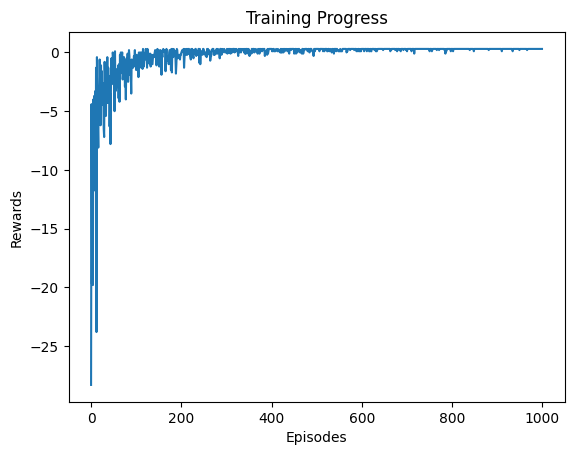

Final Q-table values:
State (0, 0): [-0.14393691 -0.20781493 -0.14791315 -0.0434062 ]
State (0, 1): [-0.05656309 -0.04915493 -0.14542369  0.062882  ]
State (0, 2): [ 0.05130211  0.18098    -0.06892134  0.17198252]
State (0, 3): [ 0.0525519   0.31188852 -0.08477542  0.08259048]
State (0, 4): [ 0.07416034  0.45259092 -0.04185463  0.0183228 ]
State (1, 0): [-0.38434876 -0.06328517 -0.33765772 -0.36410243]
State (1, 1): [0. 0. 0. 0.]
State (1, 2): [0.05690166 0.17679606 0.17660816 0.3122    ]
State (1, 3): [0.16250899 0.44411687 0.17039133 0.458     ]
State (1, 4): [0.28431586 0.62       0.30739164 0.45552954]
State (2, 0): [-0.35841811  0.10038134 -0.23322869 -0.35246087]
State (2, 1): [-0.3428335  -0.33603162 -0.26168669 -0.32504834]
State (2, 2): [0. 0. 0. 0.]
State (2, 3): [0.21965132 0.6197867  0.29874024 0.53185932]
State (2, 4): [0.45338379 0.8        0.45116051 0.61845505]
State (3, 0): [-0.25368302  0.26916086 -0.09443487 -0.13790622]
State (3, 1): [0. 0. 0. 0.]
State (3, 2): [0.0

In [10]:
import numpy as np
import gym
from gym import spaces
import random
import matplotlib.pyplot as plt

# Define the Maze Environment
class MazeEnv(gym.Env):
    def __init__(self, size=5):
        super(MazeEnv, self).__init__()
        self.size = size  # Maze grid size
        self.action_space = spaces.Discrete(4)  # Actions: 0=Up, 1=Down, 2=Left, 3=Right
        self.observation_space = spaces.Tuple((spaces.Discrete(size), spaces.Discrete(size)))
        self.start_state = (0, 0)
        self.goal_state = (size-1, size-1)
        self.state = self.start_state
        self.walls = [(1, 1), (2, 2), (3, 1)]  # Walls in the maze

    def reset(self):
        self.state = self.start_state
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 0 and (x-1, y) not in self.walls and x > 0:
            x -= 1
        elif action == 1 and (x+1, y) not in self.walls and x < self.size - 1:
            x += 1
        elif action == 2 and (x, y-1) not in self.walls and y > 0:
            y -= 1
        elif action == 3 and (x, y+1) not in self.walls and y < self.size - 1:
            y += 1

        self.state = (x, y)
        reward = 1 if self.state == self.goal_state else -0.1
        done = self.state == self.goal_state
        return self.state, reward, done, {}

    def render(self):
        maze = np.zeros((self.size, self.size))
        for w in self.walls:
            maze[w] = -1
        maze[self.goal_state] = 2
        maze[self.state] = 1
        print(maze)

# Q-learning Algorithm
maze_env = MazeEnv(size=5)
q_table = np.zeros((maze_env.size, maze_env.size, maze_env.action_space.n))

episodes = 1000
learning_rate = 0.1
discount_factor = 0.9
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01

reward_list = []

for episode in range(episodes):
    state = maze_env.reset()
    total_reward = 0
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = maze_env.action_space.sample()
        else:
            action = np.argmax(q_table[state[0], state[1], :])

        next_state, reward, done, _ = maze_env.step(action)

        q_table[state[0], state[1], action] = (1 - learning_rate) * q_table[state[0], state[1], action] + \
                                             learning_rate * (reward + discount_factor * np.max(q_table[next_state[0], next_state[1], :]))

        state = next_state
        total_reward += reward

    reward_list.append(total_reward)
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    if episode % 100 == 0:
        print(f"Episode {episode}: Total Reward = {total_reward}, Epsilon = {epsilon:.4f}")

def plot_rewards(reward_list):
    plt.plot(reward_list)
    plt.xlabel("Episodes")
    plt.ylabel("Rewards")
    plt.title("Training Progress")
    plt.show()

plot_rewards(reward_list)

# Print final Q-table
def print_q_table(q_table):
    print("Final Q-table values:")
    for i in range(q_table.shape[0]):
        for j in range(q_table.shape[1]):
            print(f"State ({i}, {j}): {q_table[i, j]}")
    print("\n")

print_q_table(q_table)


Q8

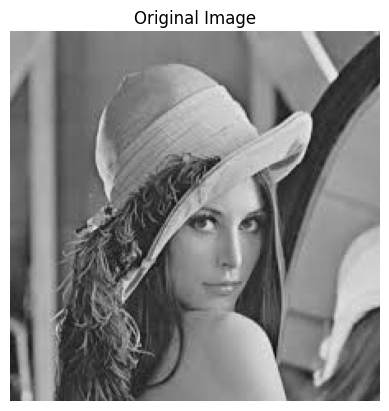

Blur Time: 0.0541s (Parallel: 0.0022s)
Sharpen Time: 0.0084s (Parallel: 0.0013s)
Edge Detection Time: 0.0082s (Parallel: 0.0054s)


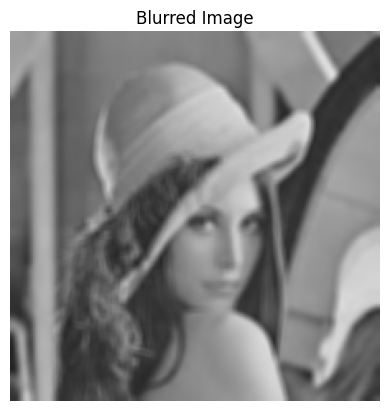

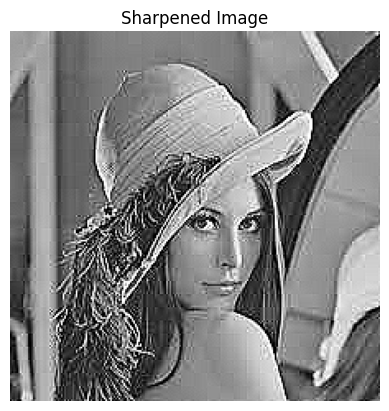

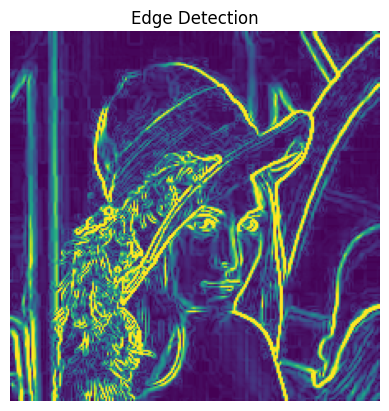

True

In [11]:
import cv2
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
import time
import numpy as np

# Load the image
def load_image(filepath):
    image = cv2.imread(filepath)
    if image is None:
        raise FileNotFoundError("Image not found.")
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
def display_image(title, image):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

image = load_image('/content/lenna.jpeg')  # Replace with your image path
display_image("Original Image", image)

# Image blurring
def blur_image(image):
    kernel = np.ones((5, 5), np.float32) / 25
    return cv2.filter2D(image, -1, kernel)

# Image sharpening
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

# Edge detection (Sobel operator)
def edge_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    edges = cv2.magnitude(sobelx, sobely)
    return cv2.convertScaleAbs(edges)



def parallelize(image, func):
    with ThreadPoolExecutor() as executor:
        result = executor.submit(func, image)
        return result.result()

def measure_time(func, image):
    start = time.time()
    result = func(image)
    end = time.time()
    return result, end - start

# Without parallelization
blurred, blur_time = measure_time(blur_image, image)
sharpened, sharpen_time = measure_time(sharpen_image, image)
edges, edge_time = measure_time(edge_detection, image)

# With parallelization
blurred_parallel, blur_time_parallel = measure_time(lambda img: parallelize(img, blur_image), image)
sharpened_parallel, sharpen_time_parallel = measure_time(lambda img: parallelize(img, sharpen_image), image)
edges_parallel, edge_time_parallel = measure_time(lambda img: parallelize(img, edge_detection), image)

print(f"Blur Time: {blur_time:.4f}s (Parallel: {blur_time_parallel:.4f}s)")
print(f"Sharpen Time: {sharpen_time:.4f}s (Parallel: {sharpen_time_parallel:.4f}s)")
print(f"Edge Detection Time: {edge_time:.4f}s (Parallel: {edge_time_parallel:.4f}s)")

# Display processed images
display_image("Blurred Image", blurred)
display_image("Sharpened Image", sharpened)
display_image("Edge Detection", edges)

# Save images
cv2.imwrite('blurred.jpg', cv2.cvtColor(blurred, cv2.COLOR_RGB2BGR))
cv2.imwrite('sharpened.jpg', cv2.cvtColor(sharpened, cv2.COLOR_RGB2BGR))
cv2.imwrite('edges.jpg', edges)

Q9


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to apply dimensionality reduction and evaluate using cross-validation
def evaluate_model(X_reduced, y, method_name, n_components):
    model = LogisticRegression(max_iter=2000)
    scores = cross_val_score(model, X_reduced, y, cv=5, scoring='accuracy')
    print(f"{method_name} ({n_components} components) - Accuracy: {np.mean(scores):.4f}")

# --- Case 1: Reduce to 2 Features ---
print("\n--- Dimensionality Reduction to 2 Features ---")
methods_2D = {
    "PCA": PCA(n_components=2),
    "LDA": LDA(n_components=2),
    "t-SNE": TSNE(n_components=2, random_state=42),
    "SVD": TruncatedSVD(n_components=2)
}

for name, method in methods_2D.items():
    X_reduced = method.fit_transform(X_scaled, y) if name == "LDA" else method.fit_transform(X_scaled)
    evaluate_model(X_reduced, y, name, 2)

# --- Case 2: Reduce to 3 Features ---
print("\n--- Dimensionality Reduction to 3 Features ---")
methods_3D = {
    "PCA": PCA(n_components=3),
    "t-SNE": TSNE(n_components=3, random_state=42),
    "SVD": TruncatedSVD(n_components=3)
}

# LDA Limitation Check
print("LDA cannot generate more than 2 components, so it is skipped for 3D.")

for name, method in methods_3D.items():
    X_reduced = method.fit_transform(X_scaled)
    evaluate_model(X_reduced, y, name, 3)



--- Dimensionality Reduction to 2 Features ---
PCA (2 components) - Accuracy: 0.9133
LDA (2 components) - Accuracy: 0.9800
t-SNE (2 components) - Accuracy: 0.8400
SVD (2 components) - Accuracy: 0.9133

--- Dimensionality Reduction to 3 Features ---
LDA cannot generate more than 2 components, so it is skipped for 3D.
PCA (3 components) - Accuracy: 0.9600
t-SNE (3 components) - Accuracy: 0.8800
SVD (3 components) - Accuracy: 0.9600


Q12

In [1]:
!pip install --upgrade numpy==1.23.5 scipy==1.11.4 scikit-learn==1.3.2

K-means Centroids:
 [[-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]]
K-medoids Medoids:
 [[-1.68665271  7.79344248]
 [-7.33898809 -7.72995396]
 [ 4.42219763  3.07194654]]
Fuzzy C-means Centroids:
 [[-2.63468297  9.04171187]
 [-6.89083823 -6.99495237]
 [ 4.7557504   2.00113144]]


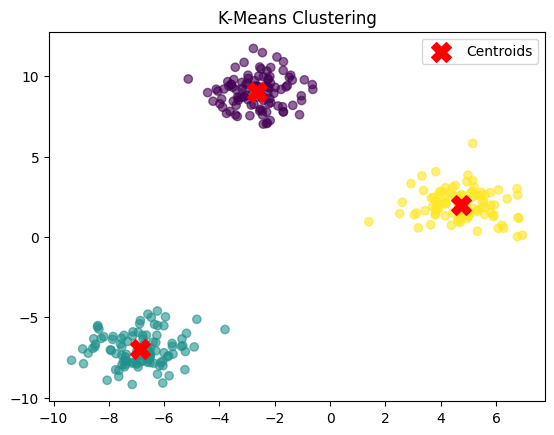

In [2]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin
from scipy.spatial.distance import cdist

def k_means(data, k, max_iter=100):
    np.random.seed(42)
    centroids = data[np.random.choice(len(data), k, replace=False)]

    for _ in range(max_iter):
        labels = pairwise_distances_argmin(data, centroids)
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        if np.allclose(centroids, new_centroids):  # More stable comparison
            break
        centroids = new_centroids

    return labels, centroids

def k_medoids(data, k, max_iter=100):
    np.random.seed(42)
    medoid_indices = np.random.choice(len(data), k, replace=False)
    medoids = data[medoid_indices]

    for _ in range(max_iter):
        distances = cdist(data, medoids, metric='euclidean')
        labels = np.argmin(distances, axis=1)

        new_medoids = np.array([
            data[np.where(labels == i)[0]][np.argmin(
                np.sum(cdist([medoids[i]], data[np.where(labels == i)[0]], metric='euclidean'), axis=1)
            )] if len(np.where(labels == i)[0]) > 0 else medoids[i]
            for i in range(k)
        ])

        if np.allclose(medoids, new_medoids):
            break
        medoids = new_medoids

    return labels, medoids

def fuzzy_c_means(data, k, m=2, max_iter=100, epsilon=1e-5):
    np.random.seed(42)
    n_samples, _ = data.shape
    u = np.random.rand(n_samples, k)
    u /= np.sum(u, axis=1, keepdims=True)

    for _ in range(max_iter):
        centroids = np.dot((u ** m).T, data) / np.sum(u ** m, axis=0, keepdims=True).T
        distances = cdist(data, centroids, metric='euclidean') + 1e-10  # Avoid divide by zero
        new_u = 1 / (distances ** (2 / (m - 1)))
        new_u /= np.sum(new_u, axis=1, keepdims=True)

        if np.linalg.norm(new_u - u) < epsilon:
            break
        u = new_u

    return u, centroids

# Example usage:
if __name__ == "__main__":
    from sklearn.datasets import make_blobs
    import matplotlib.pyplot as plt

    # Generate synthetic dataset
    data, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

    # K-means
    kmeans_labels, kmeans_centroids = k_means(data, k=3)
    print("K-means Centroids:\n", kmeans_centroids)

    # K-medoids
    kmedoids_labels, kmedoids_medoids = k_medoids(data, k=3)
    print("K-medoids Medoids:\n", kmedoids_medoids)

    # Fuzzy C-means
    fuzzy_membership, fuzzy_centroids = fuzzy_c_means(data, k=3)
    print("Fuzzy C-means Centroids:\n", fuzzy_centroids)

    # Visualization (K-Means)
    plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
    plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.legend()
    plt.title("K-Means Clustering")
    plt.show()

Q13


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Import all classifiers
from sklearn.utils import all_estimators
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression



# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Get all classifier models from sklearn
all_classifiers = all_estimators(type_filter='classifier')

results = []
for name, Model in all_classifiers:
    try:
        model = Model()
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        results.append((name, np.mean(scores)))
    except:
        pass  # Skip models that throw errors

# Sort classifiers by accuracy
sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

# Select top 4 classifiers
top_4_classifiers = sorted_results[:4]
print("Top 4 Classifiers:", top_4_classifiers)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_classes.py:32: Futu

Top 4 Classifiers: [('LinearDiscriminantAnalysis', 0.975), ('NuSVC', 0.975), ('QuadraticDiscriminantAnalysis', 0.975), ('GaussianProcessClassifier', 0.9666666666666668)]


In [4]:

#bagging

bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
bagging_acc = accuracy_score(y_test, bagging.predict(X_test))
print("Bagging Accuracy:", bagging_acc)

Bagging Accuracy: 0.9666666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [5]:
#boosting
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
adaboost_acc = accuracy_score(y_test, adaboost.predict(X_test))
print("AdaBoost Accuracy:", adaboost_acc)

gbc = GradientBoostingClassifier(n_estimators=50, random_state=42)
gbc.fit(X_train, y_train)
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print("Gradient Boosting Accuracy:", gbc_acc)


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Accuracy: 0.9333333333333333
Gradient Boosting Accuracy: 0.9666666666666667


In [6]:
#stacking


# Creating a stacking ensemble with top classifiers
stacking = StackingClassifier(
    estimators=[(top_4_classifiers[0][0], DecisionTreeClassifier()),
                (top_4_classifiers[1][0], SVC(probability=True)),
                (top_4_classifiers[2][0], LogisticRegression()),
                (top_4_classifiers[3][0], GradientBoostingClassifier())],
    final_estimator=LogisticRegression()
)

stacking.fit(X_train, y_train)
stacking_acc = accuracy_score(y_test, stacking.predict(X_test))
print("Stacking Accuracy:", stacking_acc)

Stacking Accuracy: 0.9666666666666667


In [7]:

print("\n--- Ensemble Method Accuracies ---")
print(f"Bagging Accuracy: {bagging_acc:.4f}")
print(f"AdaBoost Accuracy: {adaboost_acc:.4f}")
print(f"Gradient Boosting Accuracy: {gbc_acc:.4f}")
print(f"Stacking Accuracy: {stacking_acc:.4f}")



--- Ensemble Method Accuracies ---
Bagging Accuracy: 0.9667
AdaBoost Accuracy: 0.9333
Gradient Boosting Accuracy: 0.9667
Stacking Accuracy: 0.9667
